# Ball falling

In [2]:
from vpython import *
scene = canvas()

ball = sphere(pos=vector(0,30,0), radius=0.5, color=color.cyan)
ground = box(pos=vector(0,0,0), size=vector(12,0.2,12), color=color.green)

ball.velocity = vector(0, 0, 0)

gravity = -9.8 # in m/s^2
t = 0
deltat = 1/60  # change in time

scene.autoscale = False
while t < 3:
    rate(60)
    
    if (round(t,2) % 1 == 0):
        print("Initial height:{0} time:{1} velocity:{2}".format(30, round(t,2), round(ball.velocity.y,2)))
    
    # gravity constantly gets applied to the ball. Since code runs 60 times per second, change in time is 1/60
    # the ball's falling speed increases as time goes because the gravity constantly applies
    ball.velocity.y = ball.velocity.y + (gravity * deltat)
    
    # update the position of the ball based on the velocity
    ball.pos = ball.pos + ball.velocity * deltat
    
    # if get in contact with wall, keep it there
    if (ball.pos.y - ball.radius - ground.size.y) <= (ground.pos.y + ground.size.y):
        ball.pos.y = ground.pos.y + ground.size.y + ball.radius
        ball.velocity.y = 0
    
    t = t + deltat


<IPython.core.display.Javascript object>

Initial height:30 time:0 velocity:0.0
Initial height:30 time:1.0 velocity:-9.8
Initial height:30 time:2.0 velocity:-19.6
Initial height:30 time:3.0 velocity:0.0


***Assumption/Verification***:  
The unit of gravity is in m/s. Rate(n) runs the code 1/n times. To make a simulation that follows real-time, I decided to use rate(60) so that the code can execute 60 times per second which is equivalent to having 60 frames. But since the gravity constant is 9.8 m/s, I've set delta t(change in time) as 1/60 which is about 0.0167. In this way, I was able to make the simulation so that it runs the code 60 times using the timestep of 1/60 to make sure that t follows the real-time, meaning t=1 is equivalent to 1 second in real-time. I've decided to set the initial height to be 30m and the total amount of time the simulation runs to be 3 seconds.    
To verify the accuracy of the simulation, I decided to include a print statement inside the code and compare the velocity of the ball with the calculation. I'm going to assume that the initial height of the ball is 30m. According to our calculation, the ball's velocity on the y-axis would initially be 0 and it would decrease by a factor of gravity which is 9.8 every second. Therefore, for every second, the ball's velocity would be -9.8, -19.6, etc. Once it reaches the ground, it should stop accelerating and velocity would become 0. Now, if you run the simulation, it is showing what we expected from the above. When time is 0, meaning the ball is about to free-fall, the velocity is 0. Then, as time progresses, for every second, the velocity on the y-axis shows a constant decrease by a factor of 9.8. And since the ball moved 9.8m for the first second and 19.6m for another second, the total distance moved would be 29.4m when time=2. Therefore, it reaches the ground before time=3 and its velocity goes to 0 as expected.

# Ball bouncing

In [3]:
from vpython import *
scene = canvas()

ball = sphere(pos=vector(0,30,0), radius=0.5, color=color.cyan)
ground = box(pos=vector(0,0,0), size=vector(12,0.2,12), color=color.green)

ball.velocity = vector(0, 0, 0)

gravity = -9.8     # in m/s^2
t = 0
deltat = 1/60      # change in time
ball_elastic = 1     # coefficient of restitution, assume perfectly elastic

scene.autoscale = False
while t < 6:
    rate(60)
    
    if (round(t,2) % 1 == 0):
        print("Initial height:{0} time:{1} velocity:{2}".format(30, round(t,2), round(ball.velocity.y,2)))
    
    # gravity constantly gets applied to the ball
    ball.velocity.y = ball.velocity.y + (gravity * deltat)

    # update the position of the ball based on the velocity
    ball.pos = ball.pos + ball.velocity * deltat
    
    # if gets in contact with ground, the ball bounces
    if (ball.pos.y - ball.radius) <= (ground.pos.y + ground.size.y):
        ball.pos.y = ground.pos.y + ground.size.y + ball.radius
        ball.velocity.y = -ball.velocity.y * ball_elastic
    
    t = t + deltat


<IPython.core.display.Javascript object>

Initial height:30 time:0 velocity:0.0
Initial height:30 time:1.0 velocity:-9.8
Initial height:30 time:2.0 velocity:-19.6
Initial height:30 time:3.0 velocity:18.62
Initial height:30 time:4.0 velocity:8.82
Initial height:30 time:5.0 velocity:-0.98
Initial height:30 time:6.0 velocity:-10.78


***Assumption/Verification***:  
Since I wanted to simulate the free fall of the perfectly elastic ball, I decided to set the coefficient of restitution to 1 so that it could bounce back to reach the initial height again. Then, I've set the delta time to be 1/60 and the rate to be 60 to make t to follow the real time. Now, t=1 is the same as 1 second passed. To simplify the simulation, I decided to flip the velocity in the y-axis when the ball touches the ground and multiply it with the coefficient of restitution to add the elasticity of the ball to the system. By doing so, now the elasticity of the ball affects the bounced ball's velocity. For now, I've set the elasticity to be 1 so that the ball can reach the initial height when bounces back. Unlike the ball free-falling simulation, I decided to set it so that the simulation runs 6 seconds in total because it takes a while for the ball to hit the ground, bounce back to reach the initial height, and begin to fall again.    
To verify the simulation, I decided to include the print statements to see the changes in velocity. From there, I was able to verify that the ball does reach the initial height when gets bounced back with a velocity of 0. Then, I was able to confirm that the velocity of the ball decreased by 9.8m per second due to the presence of gravity in the system. 

# Ball launched from a cannon

In [3]:
from vpython import *
scene = canvas()

ball1 = sphere(pos=vector(-100,3,0), radius=1, color=color.red, make_trail = True)
ball2 = sphere(pos=vector(-100,3,0), radius=1, color=color.white, make_trail = True)
ball3 = sphere(pos=vector(-100,3,0), radius=1, color=color.blue, make_trail = True)

ground = box(pos=vector(0,0,0), size=vector(200,2,12), color=color.green)

ball1.velocity = vector(35, 10, 0)  # 16 deg
ball2.velocity = vector(35, 20, 0)  # 30 deg
ball3.velocity = vector(35, 30, 0)  # 40 deg

gravity = -9.8       # in m/s^2
t = 0
deltat = 1/60        # change in time
ball_elastic = 1     # coefficient of restitution, assume perfectly elastic

scene.autoscale = False
while t < 5:
    rate(60)
    
    if (round(t,2) % 1 == 0):
        print("Ball1 - time:{0} velocity:{1}".format(round(t,2), round(ball1.velocity.y,2)))
        print("Ball2 - time:{0} velocity:{1}".format(round(t,2), round(ball2.velocity.y,2)))
        print("Ball3 - time:{0} velocity:{1}".format(round(t,2), round(ball3.velocity.y,2)))
    
    # gravity constantly gets applied to the ball
    ball1.velocity.y = ball1.velocity.y + (gravity * deltat)
    ball2.velocity.y = ball2.velocity.y + (gravity * deltat)
    ball3.velocity.y = ball3.velocity.y + (gravity * deltat)
    
    # update the position of the ball based on the velocity
    ball1.pos = ball1.pos + ball1.velocity * deltat
    ball2.pos = ball2.pos + ball2.velocity * deltat
    ball3.pos = ball3.pos + ball3.velocity * deltat
    
    # if gets in contact with ground, the ball bounces
    if (ball1.pos.y - ball1.radius) <= (ground.pos.y + ground.size.y):
        ball1.pos.y = ground.pos.y + ground.size.y + ball1.radius
        ball1.velocity.y = -ball1.velocity.y * ball_elastic
    if (ball2.pos.y - ball2.radius) <= (ground.pos.y + ground.size.y):
        ball2.pos.y = ground.pos.y + ground.size.y + ball2.radius
        ball2.velocity.y = -ball2.velocity.y * ball_elastic
    if (ball3.pos.y - ball3.radius) <= (ground.pos.y + ground.size.y):
        ball3.pos.y = ground.pos.y + ground.size.y + ball3.radius
        ball3.velocity.y = -ball3.velocity.y * ball_elastic

    t = t + deltat


<IPython.core.display.Javascript object>

Ball1 - time:0 velocity:10.0
Ball2 - time:0 velocity:20.0
Ball3 - time:0 velocity:30.0
Ball1 - time:1.0 velocity:0.2
Ball2 - time:1.0 velocity:10.2
Ball3 - time:1.0 velocity:20.2
Ball1 - time:2.0 velocity:-9.6
Ball2 - time:2.0 velocity:0.4
Ball3 - time:2.0 velocity:10.4
Ball1 - time:3.0 velocity:0.45
Ball2 - time:3.0 velocity:-9.4
Ball3 - time:3.0 velocity:0.6
Ball1 - time:4.0 velocity:-9.35
Ball2 - time:4.0 velocity:-19.2
Ball3 - time:4.0 velocity:-9.2
Ball1 - time:5.0 velocity:0.53
Ball2 - time:5.0 velocity:10.71
Ball3 - time:5.0 velocity:-19.0


***Comparison / verifying accuracy***:  
The above simulation is to demonstrate balls with different launch angles getting launched from the cannon. I've verified the accuracy of the simulation by first printing the y-velocity of all the balls for every second. For the explanation, I'm going to use ball 1 which gets launched with an x-velocity of 35 and y-velocity of 10 and this is equivalent to 16 deg launch angle. As the print statements for ball 1 show, initially, it leaves the cannon with 10m/s of y-velocity and as time goes on, its velocity goes down by 9.8m/s which is a gravity. Therefore, it is clearly shown that the y-velocity of the ball is getting affected by the presence of gravity and slowly heads towards the ground which is the same as the behavior of the ball getting launched from a cannon in real life and is enough to show that the simulation is accurate.

# Revisiting ball falling simulation

### Log and plot the velocity over time of the ball for various initial heights

In [4]:
from vpython import *
import numpy as np

def free_fall_without_air_resist(height, num_iteration):

    initial_height = height
    ball = sphere(pos=vector(0,initial_height,0), radius=0.5, color=color.cyan)
    ground = box(pos=vector(0,0,0), size=vector(12,0.2,12), color=color.green)

    ball.velocity = vector(0, 0, 0)

    gravity = -9.8 # in m/s^2
    t = 0
    deltat = 1/60  # change in time
    
    velocity_array = np.array([])

    scene.autoscale = False
    while t < num_iteration:
        rate(60)

        # save all the velocities and return that list for plotting
        velocity_array = np.append(velocity_array, round(ball.velocity.y, 2))
        
        # gravity constantly gets applied to the ball. Since code runs 60 times per second, change in time is 1/60
        # the ball's falling speed increases as time goes because the gravity constantly applies
        ball.velocity.y = ball.velocity.y + (gravity * deltat)

        # update the position of the ball based on the velocity
        ball.pos = ball.pos + ball.velocity * deltat

        # if get in contact with wall, keep it there
        if (ball.pos.y - ball.radius - ground.size.y) <= (ground.pos.y + ground.size.y):
            ball.pos.y = ground.pos.y + ground.size.y + ball.radius
            ball.velocity.y = 0
            
        t = t + deltat
    
    # drop last element bc xpoints np array has 1 less element from below
    return velocity_array[:-1]

I decided to make a function that can print the velocity of the ball as it free-falls. And using the data collected from the above simulation, I logged / plotted the velocity over time of the ball for various initial heights. 

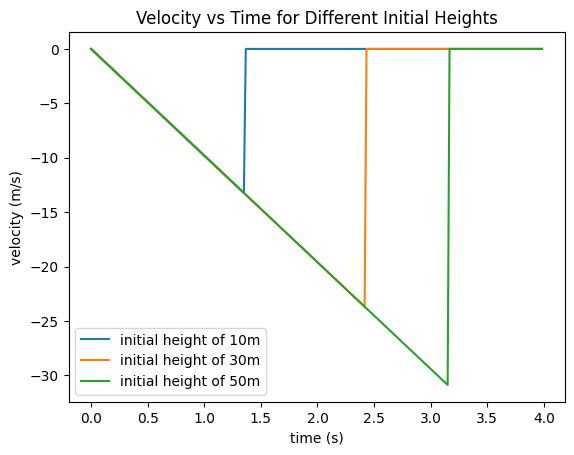

In [5]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([])

for i in np.arange(0, 4, 1/60):
    xpoints = np.append(xpoints, i)
    
ypoints1 = free_fall_without_air_resist(10, 4)  # initial height of 10m, amount of time it runs (4 sec)
ypoints2 = free_fall_without_air_resist(30, 4)  # initial height of 30m
ypoints3 = free_fall_without_air_resist(50, 4)  # initial height of 50m

plt.plot(xpoints, ypoints1, label="initial height of 10m")
plt.plot(xpoints, ypoints2, label="initial height of 30m")
plt.plot(xpoints, ypoints3, label="initial height of 50m")

plt.title("Velocity vs Time for Different Initial Heights")
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')
plt.legend()
plt.show()


### Velocity over time and maximum velocities with and without air resistance

In [6]:
# Code with air resistance
from vpython import *
import numpy as np

def free_fall_with_air_resist(height, num_iteration):
    
    initial_height = height
    mass = 1  # assume mass of the ball to be 1 kg
    ball = sphere(pos=vector(0,initial_height,0), radius=0.5, color=color.cyan)
    ground = box(pos=vector(0,0,0), size=vector(12,0.2,12), color=color.green)

    ball.velocity = vector(0, 0, 0)

    gravity = -9.8 # in m/s^2
    t = 0
    deltat = 1/60  # change in time
    
    velocity_array = np.array([])
    
    # variables for air resistance
    weight = gravity * -1 * mass    # in Newton. Multiply with -1 to make it positive
    p = 1.293                       # mass density of air = 1.293 kg m−3
    C = 0.47                        # drag coefficient for sphere
    A = 3.14 * pow(ball.radius, 2)  # cross sectional area = PI * radius of ball ^ 2
    drag = 1/2 * pow(ball.velocity.y, 2) * C * p * A

    acceleration = 0
    
    scene.autoscale = False
    while t < num_iteration:
        rate(60)
        
        # save all the velocities and return that list for plotting
        velocity_array = np.append(velocity_array, round(ball.velocity.y, 2))
            
        drag = 1/2 * pow(ball.velocity.y, 2) * C * p * A
        acceleration = (drag - weight) / mass

        ball.velocity.y = ball.velocity.y + (acceleration * deltat)
        
        # update the position of the ball based on the velocity
        ball.pos = ball.pos + ball.velocity * deltat

        # if get in contact with wall, keep it there
        if (ball.pos.y - ball.radius - ground.size.y) <= (ground.pos.y + ground.size.y):
            ball.pos.y = ground.pos.y + ground.size.y + ball.radius
            ball.velocity.y = 0

        t = t + deltat
        
    return velocity_array[:-1]


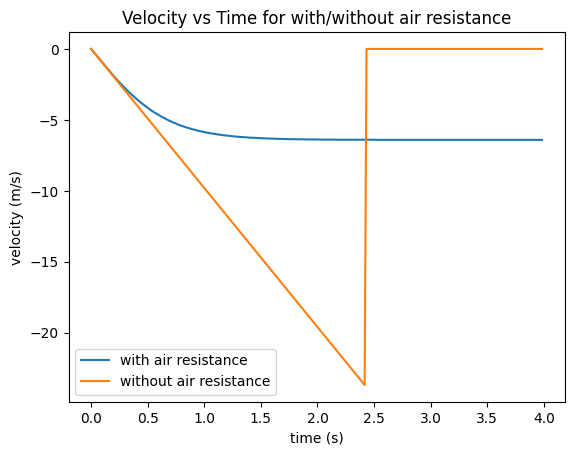

In [7]:

import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([])

for i in np.arange(0, 4, 1/60):
    xpoints = np.append(xpoints, i)
    
# initial height of 30m for both
ypoints1 = free_fall_with_air_resist(30, 4)     # with air resistance, amount of time it runs = 4 sec
ypoints2 = free_fall_without_air_resist(30, 4)  # without air resistance

plt.plot(xpoints, ypoints1, label="with air resistance")
plt.plot(xpoints, ypoints2, label="without air resistance")

plt.title("Velocity vs Time for with/without air resistance")
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')
plt.legend()
plt.show()

***Comment on finding***  
I've found out that the presence of air resistance leads to the constant velocity at some point because as the velocity of the ball increases, the air resistance also increases to the point where it leads to the acceleration of the ball to be 0 meaning the velocity is not changing. Therefore, the velocity of the ball reaches the terminal velocity, meaning the velocity no longer increases by gravity & stays the same. That's why the graph of the simulation with air resistance has a curve graph, unlike the one without air resistance.  
To find the air resistance (drag) of the ball, I used the equation below  
$$ D = 1/2 * V^2 * C_d * p * A $$
where V is for velocity, $C_d$ is for drag coefficient of sphere, p is for mass density of air, and A is for cross sectional area. Then, to find the weight of the ball, I used the equation below
$$ W = m*g $$
where m is for mass and g is for gravity.  
Using the above 2 equations together, I found the acceleration that I gave to the velocity using the equation below
$$ a = (D - W)/2 $$
By doing so, I was able to find the acceleration of the ball while taking into account the presence of the air resistance in the system.  
***Reference***:  
https://www.grc.nasa.gov/www/k-12/VirtualAero/BottleRocket/airplane/falling.html  
https://www.physicsclassroom.com/class/newtlaws/Lesson-3/Free-Fall-and-Air-Resistance  
https://www.youtube.com/watch?app=desktop&v=DxnDkDwK3JA

# Revisiting ball bouncing simulation

### Log and plot the position/height over time of the ball for various initial heights

In [9]:
from vpython import *
import numpy as np

def ball_bouncing_perfectly_elastic(height, num_iteration):
    
    velocity_array = np.array([])  # save all the velocities as an array for plotting
    ball = sphere(pos=vector(0,height,0), radius=0.5, color=color.cyan)
    ground = box(pos=vector(0,0,0), size=vector(12,0.2,12), color=color.green)

    ball.velocity = vector(0, 0, 0)

    gravity = -9.8       # in m/s^2
    t = 0
    deltat = 1/60        # change in time
    ball_elastic = 1     # coefficient of restitution, assume perfectly elastic

    scene.autoscale = False
    while t < num_iteration:
        rate(60)
        
        # save all the velocities and return that list for plotting
        velocity_array = np.append(velocity_array, round(ball.velocity.y, 2))

        # gravity constantly gets applied to the ball
        ball.velocity.y = ball.velocity.y + (gravity * deltat)

        # update the position of the ball based on the velocity
        ball.pos = ball.pos + ball.velocity * deltat

        # if gets in contact with ground, the ball bounces
        if (ball.pos.y - ball.radius) <= (ground.pos.y + ground.size.y):
            ball.pos.y = ground.pos.y + ground.size.y + ball.radius
            ball.velocity.y = -ball.velocity.y * ball_elastic

        t = t + deltat
        
    return velocity_array[:-1]

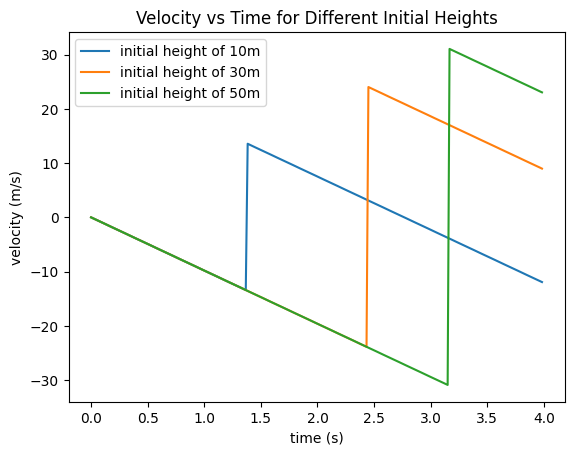

In [10]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([])

for i in np.arange(0, 4, 1/60):
    xpoints = np.append(xpoints, i)

ypoints1 = ball_bouncing_perfectly_elastic(10, 4)  # initial height of 10m
ypoints2 = ball_bouncing_perfectly_elastic(30, 4)  # initial height of 30m
ypoints3 = ball_bouncing_perfectly_elastic(50, 4)  # initial height of 50m

plt.plot(xpoints, ypoints1, label="initial height of 10m")
plt.plot(xpoints, ypoints2, label="initial height of 30m")
plt.plot(xpoints, ypoints3, label="initial height of 50m")

plt.title("Velocity vs Time for Different Initial Heights")
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')
plt.legend()
plt.show()


Since the ball bounces, you can see it having a positive velocity when it hits the ground.

### Compare the height over time for simulations assuming elastic vs. inelastic collisions

In [11]:
from vpython import *
import numpy as np

def ball_bouncing_diff_elasticity(height, elasticity, num_iteration):
    velocity_array = np.array([])  # save all the velocities as an array for plotting
    ball = sphere(pos=vector(0,height,0), radius=0.5, color=color.cyan)
    ground = box(pos=vector(0,0,0), size=vector(12,0.2,12), color=color.green)

    ball.velocity = vector(0, 0, 0)

    gravity = -9.8     # in m/s^2
    t = 0
    deltat = 1/60      # change in time
    ball_elastic = elasticity     # coefficient of restitution

    scene.autoscale = False
    while t < num_iteration:
        rate(60)
        
        # save all the velocities and return that list for plotting
        velocity_array = np.append(velocity_array, round(ball.velocity.y, 2))

        # gravity constantly gets applied to the ball
        ball.velocity.y = ball.velocity.y + (gravity * deltat)

        # update the position of the ball based on the velocity
        ball.pos = ball.pos + ball.velocity * deltat

        # if gets in contact with ground, the ball bounces
        if (ball.pos.y - ball.radius) <= (ground.pos.y + ground.size.y):
            ball.pos.y = ground.pos.y + ground.size.y + ball.radius
            ball.velocity.y = -ball.velocity.y * ball_elastic

        t = t + deltat
        
    return velocity_array[:-1]

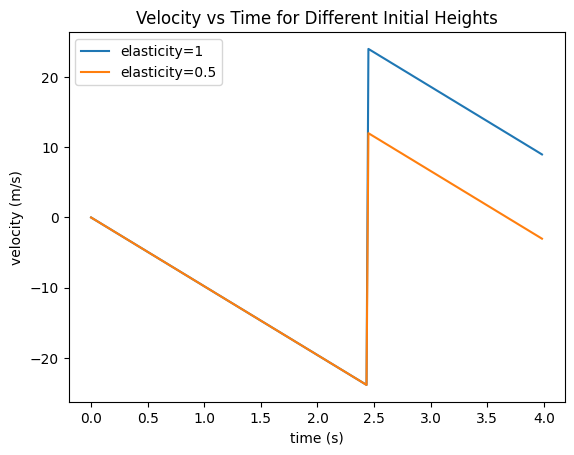

In [12]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([])

for i in np.arange(0, 4, 1/60):
    xpoints = np.append(xpoints, i)

# initial height = 30m for all
ypoints1 = ball_bouncing_diff_elasticity(30, 1, 4)     # elasticity = 1 (elastic)
ypoints2 = ball_bouncing_diff_elasticity(30, 0.5, 4)   # elasticity = 0.5 (inelastic)

plt.plot(xpoints, ypoints1, label="elasticity=1")
plt.plot(xpoints, ypoints2, label="elasticity=0.5")

plt.title("Velocity vs Time for Different Initial Heights")
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')
plt.legend()
plt.show()

Since the balls have different coefficients of restitution, you can see the difference in their velocity when they hit the ground and bounce back. To make the process easier, I decided to simply multiply the coefficient of restitution by the velocity. So, when the ball hits the ground, the velocity follows the below equation:  
$$
V = {-V * e}
$$
In this case, V is the velocity of the ball, and e is the coefficient of restitution. The velocity gets reversed and multiplied by the coefficient to reduce the speed depending on how elastic the ball is. I did not use any websites to implement the simulation with elasticity because it is a simple equation that reverses the velocity and multiplies with the coefficient of restitution.